In [1]:
import Pkg
Pkg.add("Plots")
Pkg.add("Images")
Pkg.add("ImageView")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [2]:
using LinearAlgebra, Random, Plots, Images, ImageView

In [3]:
random_seed = 11037

11037

image gets displayed inline automatically

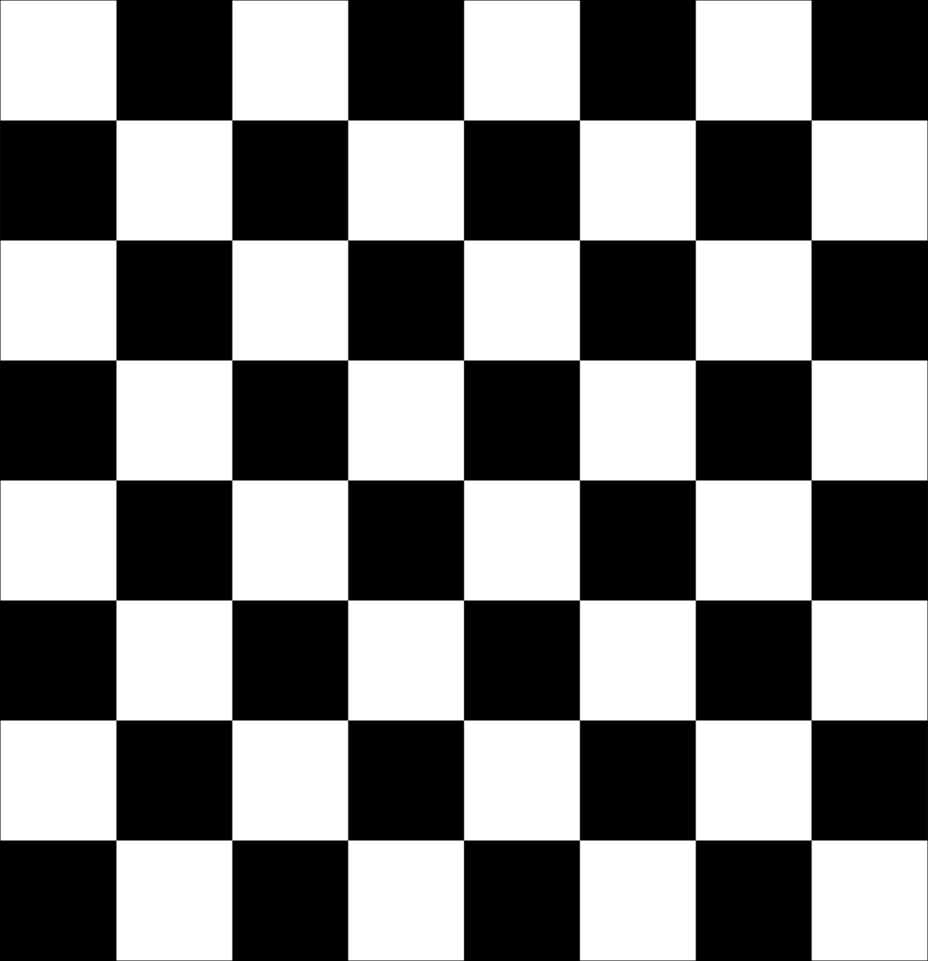

In [4]:
# https://pixabay.com/en/board-chess-chessboard-black-white-157165/
#im1 = rgb2gray(imread('chessboard.png')) # MATLAB
im1 = float.(Gray.(load("Oblig_2_Graphics/chessboard.png")))

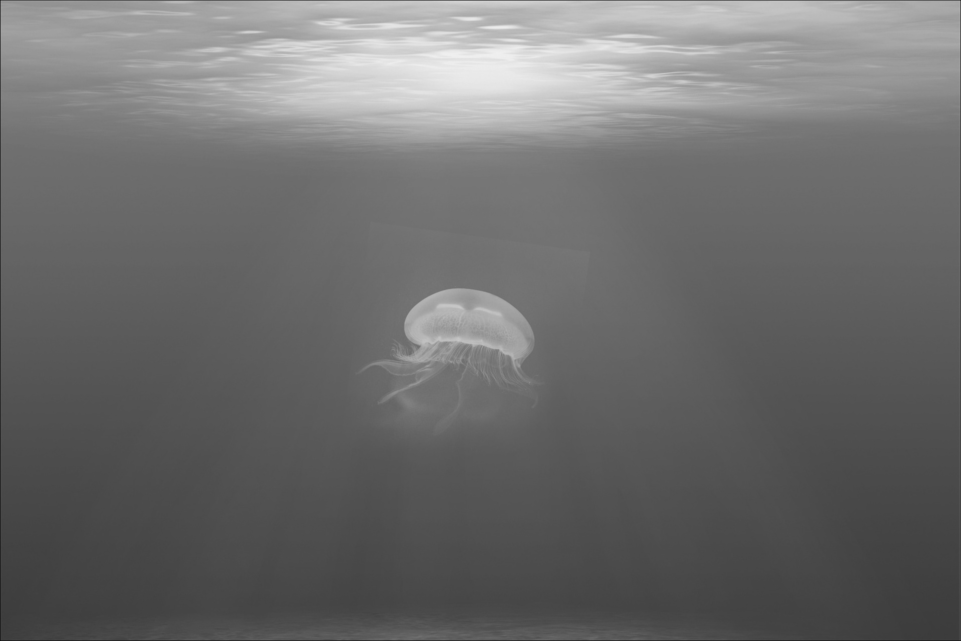

In [5]:
# https://pixabay.com/en/jellyfish-under-water-sea-ocean-698521/
im2 = float.(Gray.(load("Oblig_2_Graphics/jellyfish.jpg")))

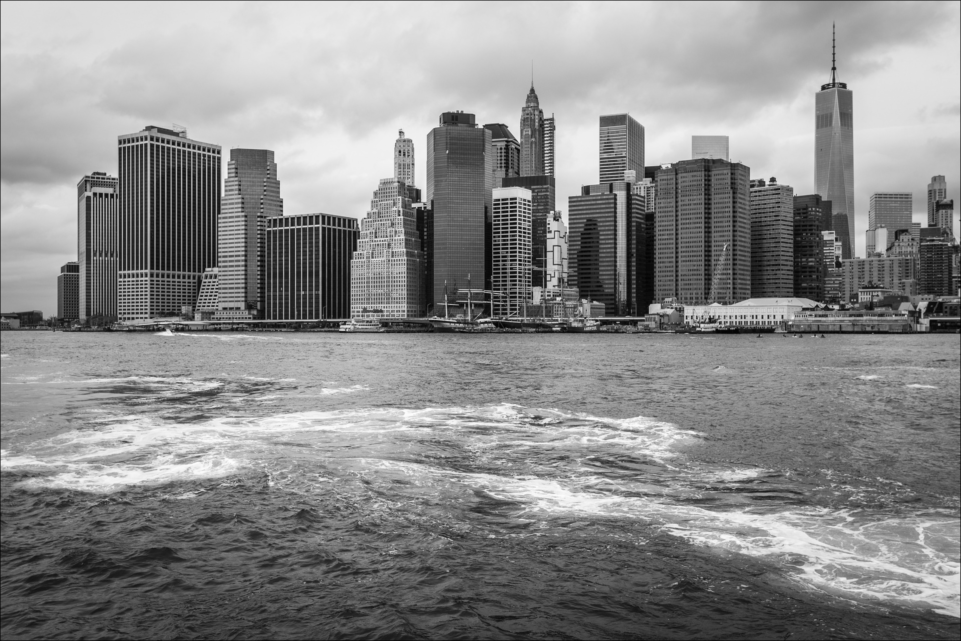

In [6]:
# https://pixabay.com/photos/outdoors-new-york-skyline-nyc-city-5129182/
im3 = float.(Gray.(load("Oblig_2_Graphics/outdoors-5129182_1920.jpg")))


In [17]:
# verify gray runs from 0 to 1
display("First image")
display(extrema(im1))
display(size(im1))

display("Second image")
display(extrema(im2))
display(size(im2))

display("Third image")
display(extrema(im3))
display(size(im3))

"First image"

(Gray{Float32}(0.0f0), Gray{Float32}(1.0f0))

(1920, 1854)

"Second image"

(Gray{Float32}(0.16470589f0), Gray{Float32}(0.9411765f0))

(1280, 1920)

"Third image"

(Gray{Float32}(0.0f0), Gray{Float32}(1.0f0))

(1280, 1920)

In [14]:
# close enough

## SVD

In [22]:
U, S, V = svd(im1)

SVD{Float32, Float32, Matrix{Float32}, Vector{Float32}}
U factor:
1920×1854 Matrix{Float32}:
 -0.023689    0.0219254  -0.0197475  -0.0580339  …  -7.20491f-8   0.00112779
 -0.0236882   0.021924   -0.0349352  -0.0255754      1.30628f-5  -0.272456
 -0.0236886   0.0219236  -0.0354459  -0.0250682     -1.63168f-6   0.0014995
 -0.0236886   0.0219235  -0.0352519  -0.0249593      5.41897f-6   0.0284022
 -0.0236886   0.0219235  -0.0352445  -0.0249038     -2.27917f-6   0.0526757
 -0.0236886   0.0219235  -0.0352445  -0.0249024  …  -7.32709f-5   0.707663
 -0.0236886   0.0219235  -0.0352445  -0.0249024      8.25564f-6  -0.100155
 -0.0236886   0.0219235  -0.0352445  -0.0249024      6.96228f-6  -0.200311
 -0.0236886   0.0219235  -0.0352445  -0.0249024     -4.90124f-6   0.139307
 -0.0236886   0.0219235  -0.0352445  -0.0249024     -3.65023f-6   0.106227
  ⋮                                              ⋱               
 -0.0219227  -0.0236879  -0.0116072   0.0214621      9.40754f-7   0.000349693
 -0.0219

In [27]:
# verify SVD
im1 ≈ U * Diagonal(S) * V'

true

In [29]:
# the singular values
display(S)

1854-element Vector{Float32}:
 943.19403
 942.1776
   4.052274
   1.2189392
   0.57682675
   0.4271212
   0.19300236
   0.14436428
   0.11085648
   0.062418055
   ⋮
   5.6145083f-5
   5.6145083f-5
   5.6145083f-5
   5.6145083f-5
   5.6145083f-5
   5.6145083f-5
   5.6145083f-5
   5.6145083f-5
   1.4960794f-5

## Plotting

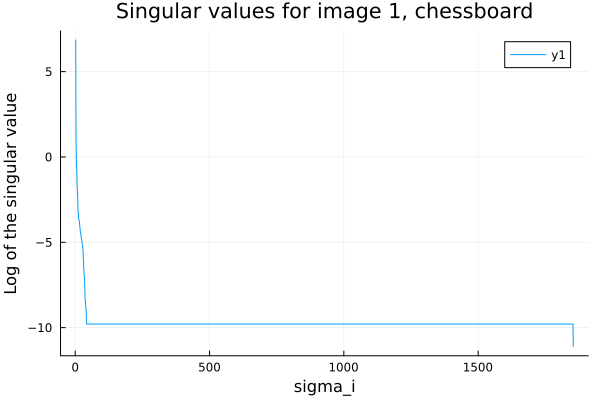

"/Users/aero/Documents/Work/MAT4110/Oblig/MAT4110 Julia/Oblig_2_Graphics/logplot_image1.png"

In [35]:
# julia logplot
p1 = plot(log.(S))
xlabel!("sigma_i")
ylabel!("Log of the singular value")
title!("Singular values for image 1, chessboard")
    
display(p1)
savefig("Oblig_2_Graphics/logplot_image1.png")

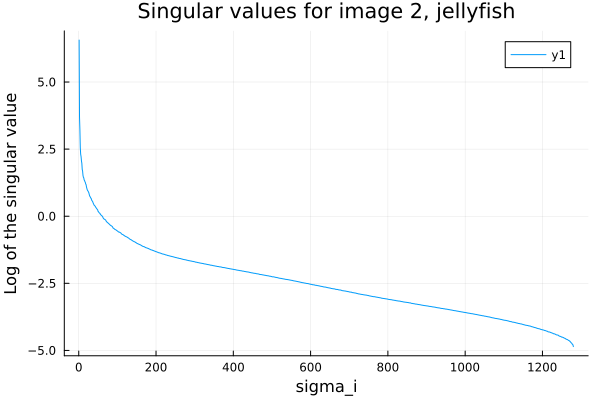

"/Users/aero/Documents/Work/MAT4110/Oblig/MAT4110 Julia/Oblig_2_Graphics/logplot_image2.png"

In [38]:
U2, S2, V2 = svd(im2)
p2 = plot(log.(S2))
xlabel!("sigma_i")
ylabel!("Log of the singular value")
title!("Singular values for image 2, jellyfish")
    
display(p2)
savefig("Oblig_2_Graphics/logplot_image2.png")

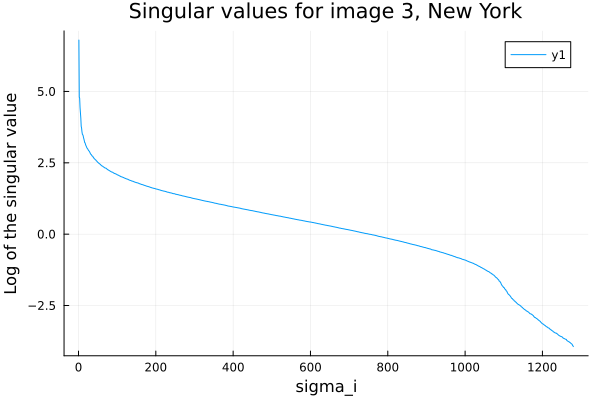

"/Users/aero/Documents/Work/MAT4110/Oblig/MAT4110 Julia/Oblig_2_Graphics/logplot_image3.png"

In [37]:
U3, S3, V3 = svd(im3)
p3 = plot(log.(S3))
xlabel!("sigma_i")
ylabel!("Log of the singular value")
title!("Singular values for image 3, New York")
    
display(p3)
savefig("Oblig_2_Graphics/logplot_image3.png")